# Basal Scaling for Nu<sub>Top</sub>, Nu<sub>Bottom</sub>, and V<sub>RMS</sub>

In [6]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math

%config InlineBackend.figure_formats = ['svg']

In [7]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 9.
plt.rcParams['lines.markeredgewidth'] = 0.7

In [8]:
save_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Data\\'
Data=pd.read_csv(save_path+'data_short.csv')
Data

,Ra,NuT,NuB,VRMS,Surface
0,1.000000e+04,4.733542,4.733476,34.289954,31.914000
1,1.000000e+05,11.254625,11.254650,168.172663,165.990000
2,1.000000e+06,23.502768,23.502513,703.962729,710.800000
3,3.000000e+06,31.095661,31.100028,1709.982815,1861.628650
4,1.000000e+07,45.505646,45.577672,3662.422424,3981.935294
5,3.000000e+07,62.299088,62.188502,6290.388991,6685.217969
6,1.000000e+08,85.241843,85.097414,13433.219966,13974.338182
7,3.000000e+08,130.988048,131.153087,29119.044641,30982.998624
8,6.000000e+08,149.581901,149.238364,32284.956668,30815.204762
9,1.000000e+09,173.733978,174.123207,43355.162240,40996.437276


In [9]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

dataS = [[] for i in range(lenRa)] #empty nested list for largest resolution value

for i in range(lenRa):
    dataS[i] = Data.loc[(Data['Ra'] == RaU[i])]
    
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

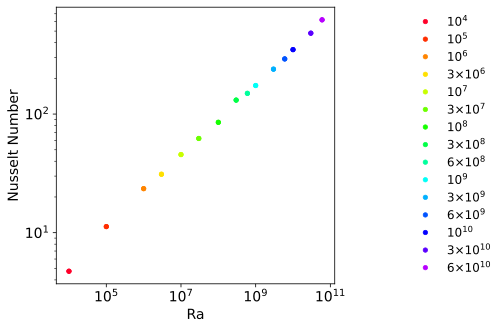

In [19]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'raw_nu.png',pad_inches=0.1,bbox_inches='tight');

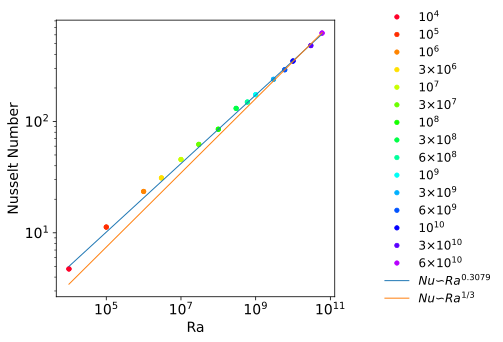

In [10]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_nu.png',pad_inches=0.1,bbox_inches='tight');

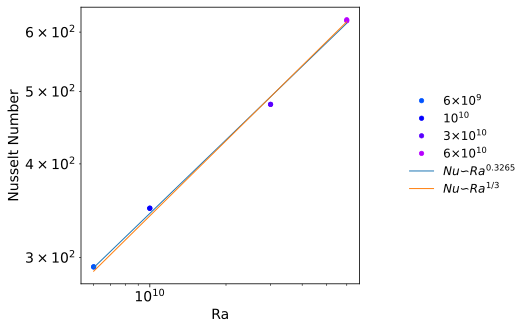

In [11]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa-4,lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])
#     print(i)
#     print(RaU[i])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(RaU[lenRa-4],np.max(RaU),1e8)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_Nu_last.png',pad_inches=0.1,bbox_inches='tight');

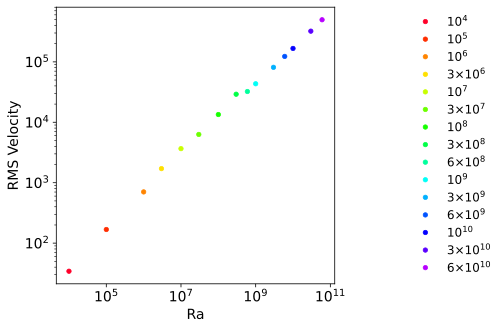

In [20]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'raw_vrms.png',pad_inches=0.1,bbox_inches='tight');

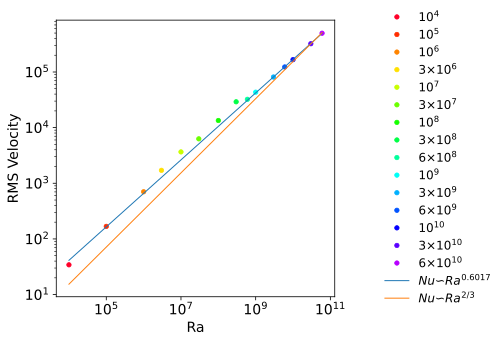

In [12]:
list1 = []; list2 = [];

for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    list1.append(Data.at[i, 'Ra']);
    list2.append(Data.at[i, 'VRMS']);

plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{2/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_vrms.png',pad_inches=0.1,bbox_inches='tight');

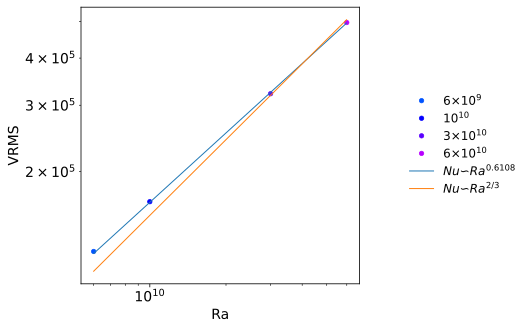

In [13]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa-4,lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    list1.append(Data.at[i, 'Ra']);
    list2.append(Data.at[i, 'VRMS']);

plt.ylabel('VRMS'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(RaU[lenRa-4],np.max(RaU),1e8)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{2/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

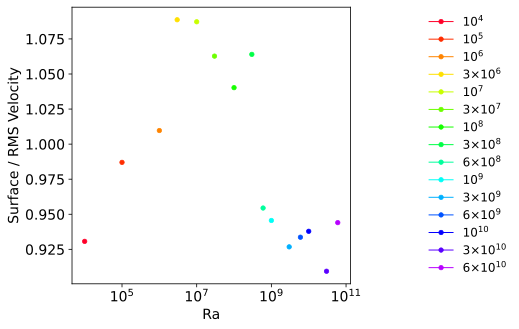

In [14]:
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['Surface']/Data.iloc[[i]]['VRMS'],'.-',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])

plt.ylabel('Surface / RMS Velocity'); plt.xlabel('Ra');
plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'valo_ratio.png',pad_inches=0.1,bbox_inches='tight');

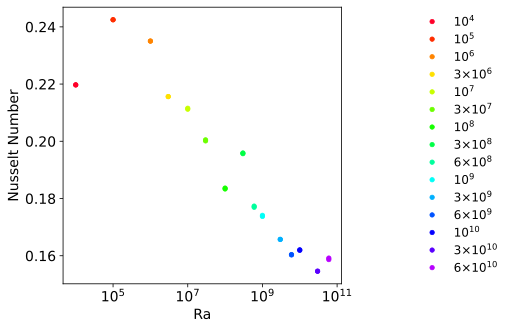

In [18]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],(Data.iloc[[i]]['NuT'])/Data.iloc[[i]]['Ra']**(1/3),'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB']/Data.iloc[[i]]['Ra']**(1/3),'.',color=colors[i])


plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

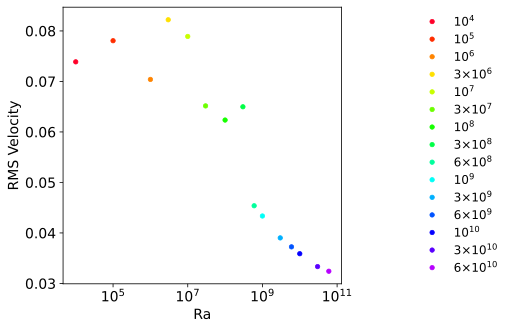

In [23]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],(Data.iloc[[i]]['VRMS'])/Data.iloc[[i]]['Ra']**(2/3),'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])


plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));